In [3]:
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
complete_df = pd.read_csv("full_data.csv")
complete_df.info()

complete_df = complete_df.loc[~complete_df.duplicated(subset=['County','State'])]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                    2851 non-null   int64  
 1   County                                                                                        2851 non-null   object 
 2   State                                                                                         2851 non-null   object 
 3   Total Population                                                                              2851 non-null   float64
 4   Land Area (m^2)                                                                               2851 non-null   float64
 5   Population Density (per m^2

In [5]:
pop_dense = complete_df['Population Density (per m^2)']
sq_mile = complete_df['Land Area (m^2)']

avg_income = complete_df['Income per capita']
gross_rent = complete_df['Median Gross Rent']

 

Text(0.5, 1.0, 'Population Density (person per m^2)')

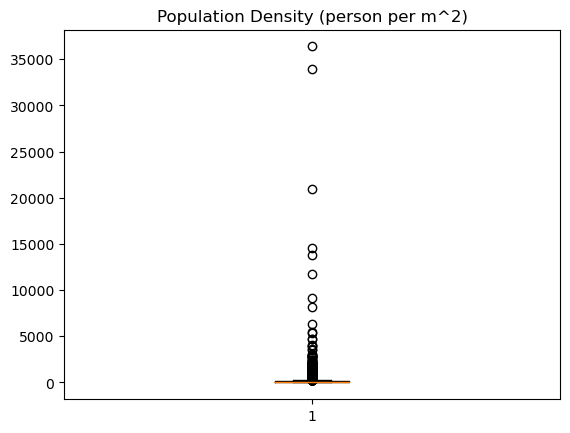

In [6]:
plt.boxplot(pop_dense)
plt.title("Population Density (person per m^2)")

(0.0, 400.0)

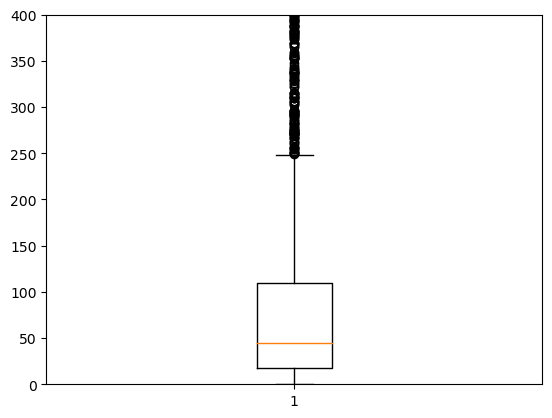

In [7]:
plt.boxplot(pop_dense)
plt.ylim(0,400)

In [8]:
len(complete_df.loc[complete_df['Population Density (per m^2)']>250])/len(complete_df['Population Density (per m^2)'])

0.1372618207480593

Determine cutoff for outliers based on IQR?

In [9]:
complete_df['Population Density (per m^2)'].describe()

count     2834.000000
mean       211.278574
std       1195.144933
min          0.203252
25%         17.223321
50%         44.545271
75%        109.970286
max      36384.792432
Name: Population Density (per m^2), dtype: float64

In [10]:
quartiles = complete_df['Population Density (per m^2)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")
print(f'Values below {lower_bound} may be outliers')
print(f'Values above {upper_bound} may be outliers')

The lower quartile is 17.22332115416988
The upper quartile is 109.97028601127809
Values below -121.89712613149244 may be outliers
Values above 249.0907332969404 may be outliers


Parsing data into low pop density and high pop density groups

In [11]:
low_den_df = complete_df.loc[complete_df['Population Density (per m^2)']<upper_bound]
low_den_df.head()

,Unnamed: 0,County,State,Total Population,Land Area (m^2),Population Density (per m^2),Median Gross Rent,Income per capita,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21",...,"Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
0,0,Autauga,Alabama,55639.0,594.44,93.599018,1011.0,29804.0,4126.0,12977.0,...,32.758621,28.694401,28.131469,6242.0,11.2,24985.0,1420.0,5.4,67565.0,125.217762
1,1,Baldwin,Alabama,218289.0,1589.78,137.307678,1032.0,33751.0,14555.0,44342.0,...,27.375492,31.188379,32.450286,20189.0,8.9,92751.0,6159.0,6.2,71135.0,131.834019
2,2,Barbour,Alabama,25026.0,884.88,28.281801,587.0,20074.0,4378.0,6600.0,...,36.676855,27.841067,11.153098,5548.0,25.5,8004.0,676.0,7.8,38866.0,72.030097
3,3,Bibb,Alabama,22374.0,622.58,35.937550,693.0,22626.0,3125.0,7052.0,...,43.918540,24.705736,11.913807,3549.0,17.8,8073.0,639.0,7.3,50907.0,94.345602
4,4,Blount,Alabama,57755.0,644.78,89.573188,666.0,25457.0,6650.0,14284.0,...,35.123439,33.621029,14.903610,7525.0,13.1,23973.0,1143.0,4.6,55203.0,102.307350


In [12]:
high_den_df = complete_df.loc[complete_df['Population Density (per m^2)']>upper_bound]
high_den_df.head()

,Unnamed: 0,County,State,Total Population,Land Area (m^2),Population Density (per m^2),Median Gross Rent,Income per capita,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21",...,"Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
13,13,McCracken,Kentucky,65485.0,248.74,263.266865,744.0,30044.0,3582.0,15235.0,...,32.206579,33.517250,26.703873,9974.0,15.5,4485.0,337.0,7.0,31453.0,58.166587
26,26,Oldham,Kentucky,66508.0,187.22,355.239825,964.0,44186.0,2728.0,8888.0,...,19.787168,29.734182,44.405361,3143.0,5.0,4770.0,315.0,6.2,45177.0,83.546621
55,55,Anoka,Minnesota,353775.0,423.01,836.327746,1162.0,37804.0,14435.0,67611.0,...,27.433406,35.428780,31.280761,25261.0,7.1,17812.0,1225.0,6.4,60159.0,79.692406
61,61,Carver,Minnesota,103561.0,354.33,292.272740,1170.0,48492.0,2634.0,12397.0,...,17.912928,28.592483,49.688615,3731.0,3.5,13194.0,1357.0,9.3,52271.0,69.243201
66,66,Montgomery,Tennessee,204992.0,539.18,380.192144,972.0,28032.0,8634.0,36120.0,...,26.886203,36.821146,29.865867,22576.0,10.8,3421.0,192.0,5.3,64271.0,112.831361


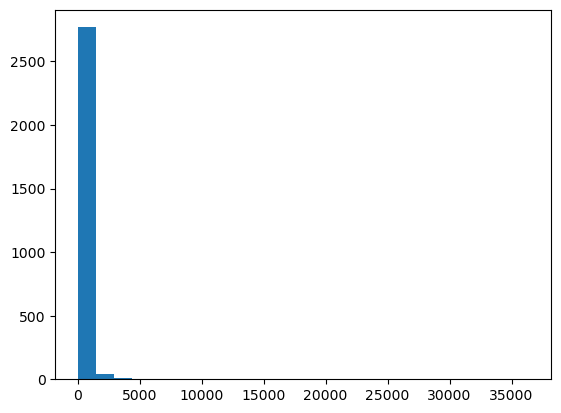

In [13]:
pop_histo = plt.hist(pop_dense, bins = 25)

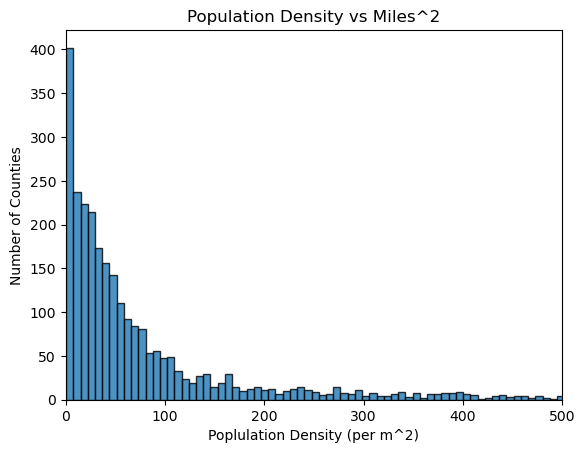

In [14]:
pop_histo = plt.hist(pop_dense, bins = 5000, alpha = .8, edgecolor = 'black')
plt.xlim(0,500)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Number of Counties")
plt.title("Population Density vs Miles^2")

plt.savefig('outputs/densityhisto.png')

rvalue: -0.06756208340829313
p-value: 0.00031917832549529346


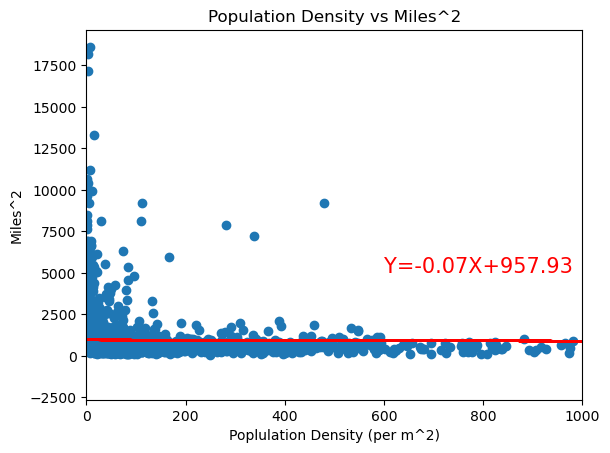

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,sq_mile)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlim(0,1000)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Miles^2")
plt.title("Population Density vs Miles^2")
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")
plt.savefig('outputs/linreg_pop_vs_miles.png')

rvalue: 0.18321063739905155
p-value: 8.172353349826106e-23


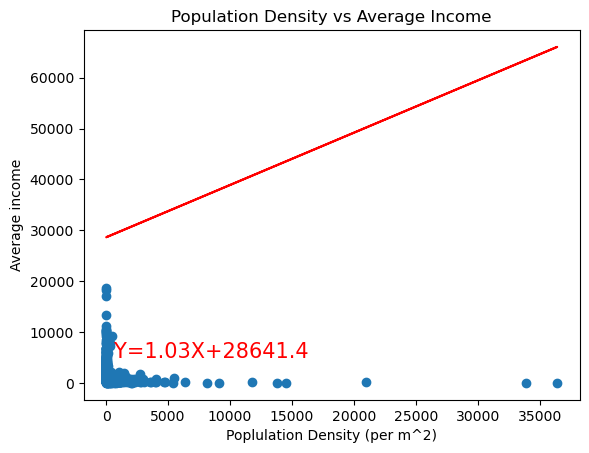

In [16]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,avg_income)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)

plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Average income")
plt.title("Population Density vs Average Income")

print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")

rvalue: 0.31183965553911813
p-value: 5.864022477489176e-65


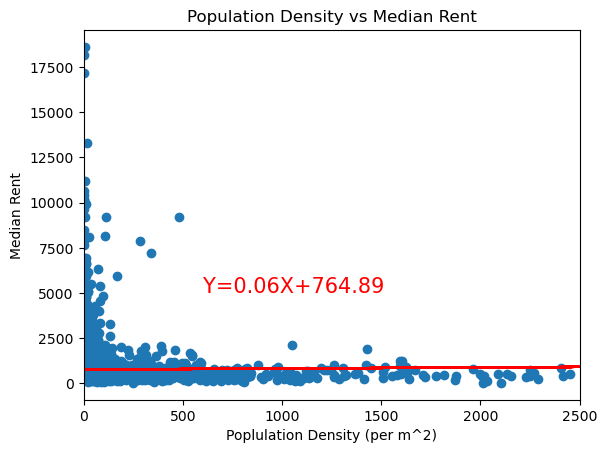

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,gross_rent)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlim(0,2500)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Median Rent")
plt.title("Population Density vs Median Rent")
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")


Text(0.5, 1.0, 'Average income vs Median Rent')

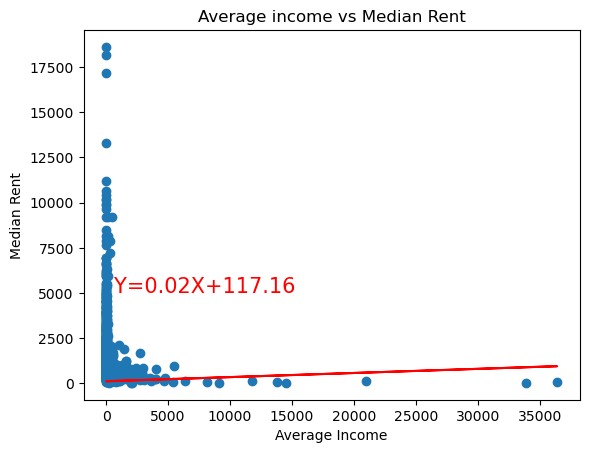

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_income,gross_rent)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlabel("Average Income")
plt.ylabel("Median Rent")
plt.title("Average income vs Median Rent")

# Population Density Analyses

In [19]:
low_den_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2850
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                    2443 non-null   int64  
 1   County                                                                                        2443 non-null   object 
 2   State                                                                                         2443 non-null   object 
 3   Total Population                                                                              2443 non-null   float64
 4   Land Area (m^2)                                                                               2443 non-null   float64
 5   Population Density (per m^2

In [20]:
high_den_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 13 to 2845
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                    391 non-null    int64  
 1   County                                                                                        391 non-null    object 
 2   State                                                                                         391 non-null    object 
 3   Total Population                                                                              391 non-null    float64
 4   Land Area (m^2)                                                                               391 non-null    float64
 5   Population Density (per m^2

## Low & High - Histogram of Population Density (O/Ma)

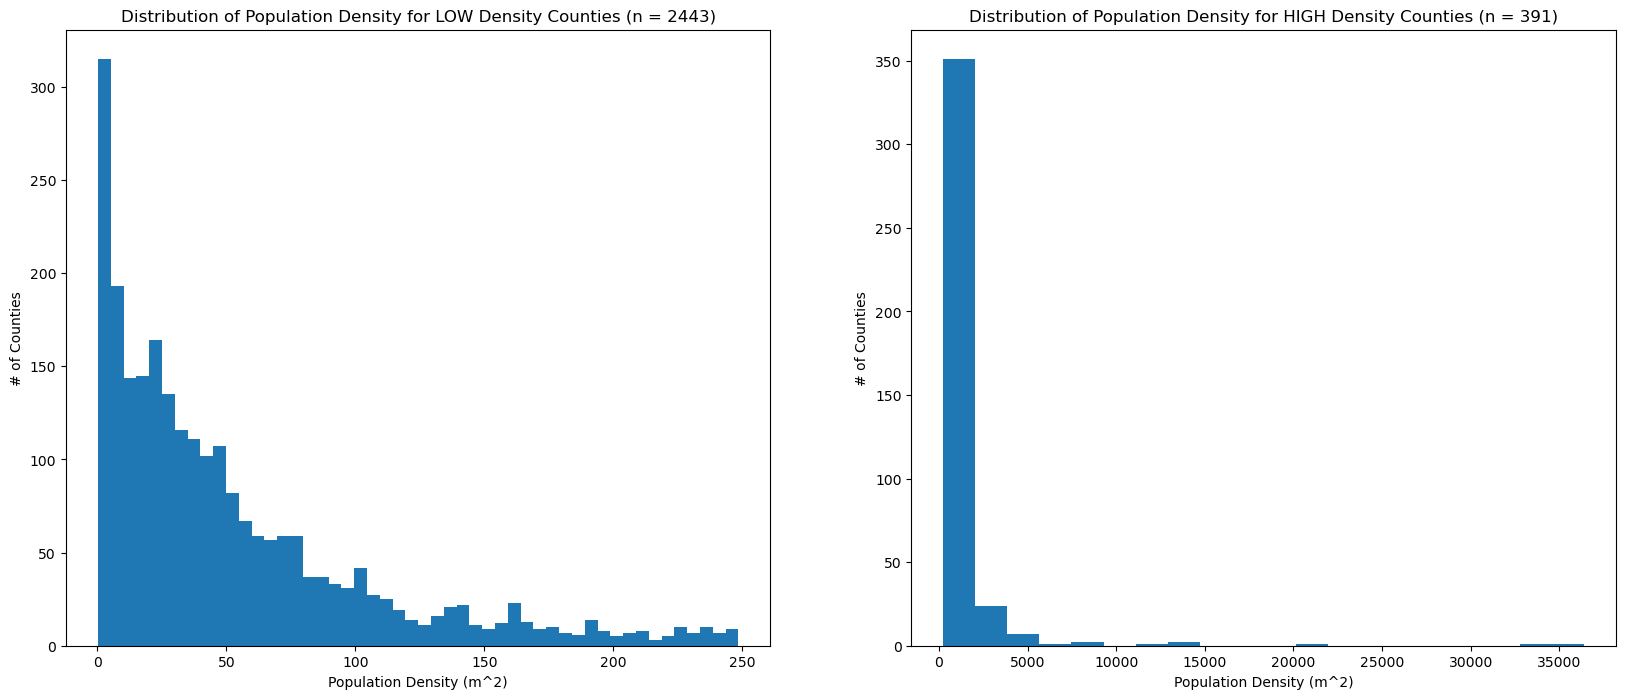

In [21]:
# plotting code
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(20,8))

ax0.hist(low_den_df['Population Density (per m^2)'], bins=50)
ax0.set_ylabel("# of Counties")
ax0.set_xlabel('Population Density (m^2)')
ax0.set_title(f"Distribution of Population Density for LOW Density Counties (n = {len(low_den_df)})")

ax1.hist(high_den_df['Population Density (per m^2)'], bins=20)
ax1.set_ylabel("# of Counties")
ax1.set_xlabel('Population Density (m^2)')
ax1.set_title(f"Distribution of Population Density for HIGH Density Counties (n = {len(high_den_df)})")

plt.savefig('outputs/high_low_histo_pop_density')

## Low - Population Density vs. Land Area $m^2$ (Morgen)

p value : 1.2327119324956422e-30


Text(0.5, 1.0, 'Low Population Density vs. Land Area')

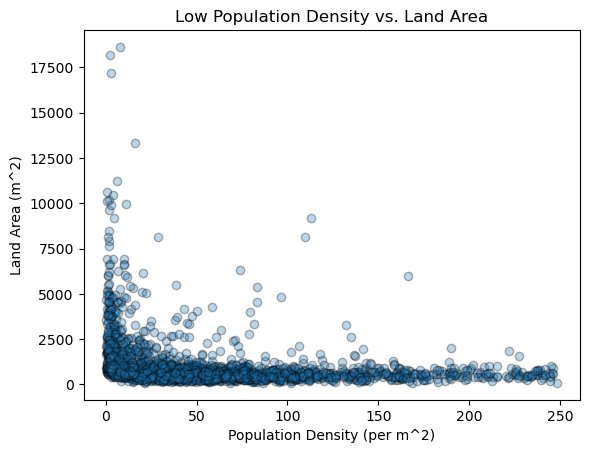

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(low_den_df["Population Density (per m^2)"],
                                                        low_den_df["Land Area (m^2)"])
regress_eq = slope * low_den_df["Population Density (per m^2)"] + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
print(f'p value : {pvalue}')

plt.scatter(low_den_df["Population Density (per m^2)"], low_den_df["Land Area (m^2)"], edgecolors = 'black', alpha = .3)
# plt.plot(low_den_df["Population Density (per m^2)"], regress_eq, "r-")
# plt.annotate(line_eq,(100,10000), fontsize = 15, color = 'red')
plt.xlabel("Population Density (per m^2)")
plt.ylabel("Land Area (m^2)")
plt.title("Low Population Density vs. Land Area")

## High - Population Density vs. Land Area $m^2$ (Morgen)

p value : 0.018985187468361097


Text(0.5, 1.0, 'High Population Density vs. Land Area')

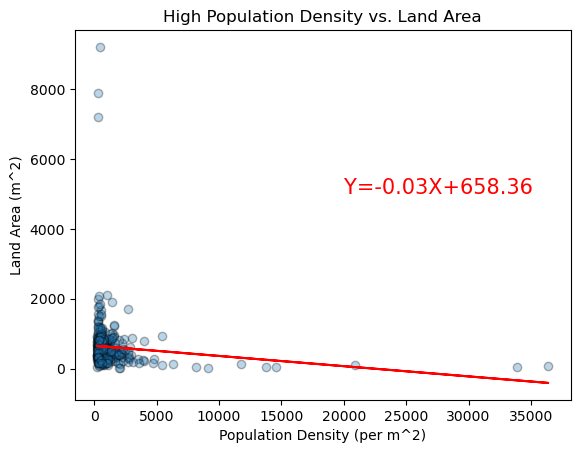

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(high_den_df["Population Density (per m^2)"],
                                                        high_den_df["Land Area (m^2)"])
regress_eq = slope * high_den_df["Population Density (per m^2)"] + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
print(f'p value : {pvalue}')

plt.scatter(high_den_df["Population Density (per m^2)"], high_den_df["Land Area (m^2)"], edgecolors = 'black', alpha = .3)
plt.plot(high_den_df["Population Density (per m^2)"], regress_eq, "r-")
plt.annotate(line_eq,(20000,5000), fontsize = 15, color = 'red')
plt.xlabel("Population Density (per m^2)")
plt.ylabel("Land Area (m^2)")
plt.title("High Population Density vs. Land Area")

## Low - Population Density vs. Median Gross Rent (Ryan)

## High - Population Density vs. Median Gross Rent (Ryan)

## Education Visualizations

### Low - Population Density vs. Education things (Gina)

### High - Population Density vs. Education things (Gina)

### Low - Education vs. Median Household Income (Ryan)

### High - Education vs. Median Household Income (Ryan)

## Population Density vs. Income Stuff

### Low - Population Density vs. Median_household_income (O)

In [24]:
# Set variables
low_pop_dens = low_den_df['Population Density (per m^2)']
high_pop_dens = high_den_df['Population Density (per m^2)']
low_median_house_income = low_den_df['Median_Household_Income_2020']
high_median_house_income = high_den_df['Median_Household_Income_2020']

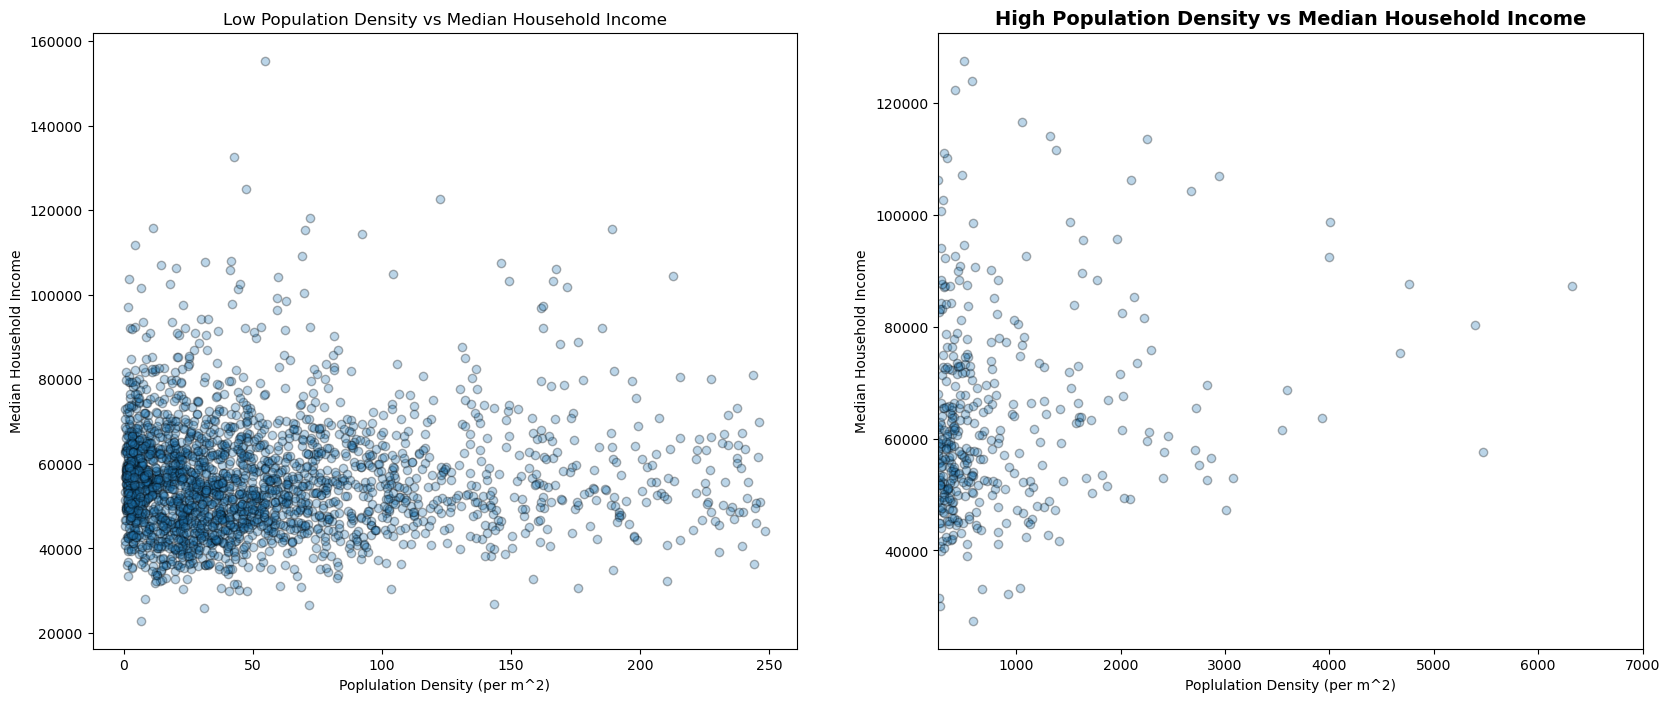

In [25]:
fig_pop_medhouse, (ax0, ax1)  = plt.subplots(ncols=2, nrows=1, figsize=(20,8))

ax0.scatter(low_pop_dens , low_median_house_income , edgecolors = 'black', alpha = .3)
ax0.set_xlabel("Poplulation Density (per m^2)")
ax0.set_ylabel("Median Household Income")
ax0.set_title("Low Population Density vs Median Household Income")

ax1.scatter(high_pop_dens , high_median_house_income, edgecolors = 'black', alpha = .3)
ax1.set_xlabel("Poplulation Density (per m^2)")
ax1.set_ylabel("Median Household Income")
ax1.set_xlim(250, 7000)
ax1.set_title("High Population Density vs Median Household Income",fontweight = 'bold', fontsize = 14)



plt.savefig('outputs/combo_high_low_scatter_density_vs_house_income.png')

### Low & High - Population Density vs. Income per capita (Mark)

In [26]:
# calculating correlations
low_den_corr = st.pearsonr(low_den_df['Population Density (per m^2)'], low_den_df['Income per capita'])
high_den_corr = st.pearsonr(high_den_df['Population Density (per m^2)'], high_den_df['Income per capita'])

print(f"For low density counties, Population density's relationship with income per capita is statistically significant: p = {round(low_den_corr[1],19)}, but the relationship is nominal: r={round(low_den_corr[0],3)}")
print(f"For high density counties, Population density's relationship with income per capita is not statistically significant: p = {round(high_den_corr[1],3)}")

For low density counties, Population density's relationship with income per capita is statistically significant: p = 5e-19, but the relationship is nominal: r=0.179
For high density counties, Population density's relationship with income per capita is not statistically significant: p = 0.14


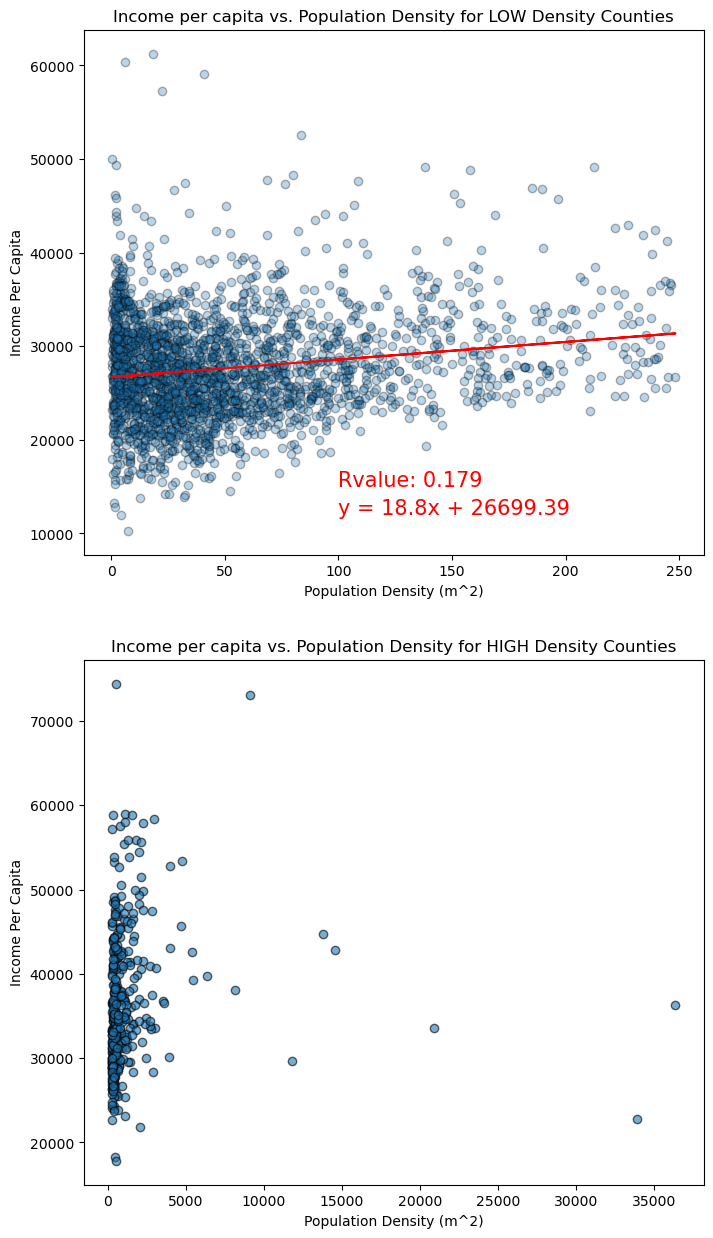

In [27]:
# code to calculate linear regressions
(m1,b1,rvalue1,pvalue1,stderr1) = linregress(low_den_df['Population Density (per m^2)'], low_den_df['Income per capita'])
(m2,b2,rvalue2,pvalue2,stderr2) = linregress(high_den_df['Population Density (per m^2)'], high_den_df['Income per capita'])

y_pred_low = m1*low_den_df['Population Density (per m^2)'] + b1
#y_pred_high = m2*high_den_df['Population Density (per m^2)'] + b2 (not plotting the regression because the relationship is insignificant)

low_den_lineq = f"y = {round(m1,2)}x + {round(b1,2)}"
#high_den_lineq = f"y = {round(m2,2)}x + {round(b2,2)}" (not plotting the regression because the relationship is insignificant)


# plotting code
fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, figsize=(8,15))

ax0.scatter(low_den_df['Population Density (per m^2)'], low_den_df['Income per capita'],
            edgecolors = 'black', alpha = .3)
ax0.plot(low_den_df['Population Density (per m^2)'], y_pred_low, color='r')
ax0.set_ylabel("Income Per Capita")
ax0.set_xlabel('Population Density (m^2)')
ax0.set_title("Income per capita vs. Population Density for LOW Density Counties")
ax0.annotate(low_den_lineq, (100, 12000), fontsize=15, color='r')
ax0.annotate((f"Rvalue: {round(rvalue1,3)}"), (100, 15000), fontsize=15, color='r')

ax1.scatter(high_den_df['Population Density (per m^2)'], high_den_df['Income per capita'],
            edgecolors = 'black', alpha = .6)
#ax1.plot(high_den_df['Population Density (per m^2)'], y_pred_high, color='r') (not plotting the regression because it is insignificant)
ax1.set_ylabel("Income Per Capita")
ax1.set_xlabel('Population Density (m^2)')
ax1.set_title("Income per capita vs. Population Density for HIGH Density Counties")
#ax1.annotate(high_den_lineq, (100, 12000), fontsize=15, color='r') (not plotting the regression because it is insignificant)

plt.savefig('outputs/high_low_scatter_popDen_income')

Adding a t-test to examine whether the average income per capita in high density counties is significantly different than the avg. income per capita in a low density county. 

In [28]:
low_den_income_mean = low_den_df['Income per capita'].mean()
high_den_income_mean = high_den_df['Income per capita'].mean()
print(f"Avg. Income per capita for low density counties is ${round(low_den_income_mean,2)}")
print(f"Avg. Income per capita for high density counties is ${round(high_den_income_mean,2)}")



low_den_income = low_den_df['Income per capita']
high_den_income = high_den_df['Income per capita']
st.ttest_ind(low_den_income, high_den_income, equal_var=False)

Avg. Income per capita for low density counties is $27686.5
Avg. Income per capita for high density counties is $36181.54


Ttest_indResult(statistic=-19.547052778075447, pvalue=5.478775762275457e-62)

Heatmap Work

In [29]:
# variables
high_corr_test = high_den_df.corr()
low_corr_test = low_den_df.corr()


/var/folders/j2/_m4yn2l96j99yv7w9_917_b80000gn/T/ipykernel_54133/2093058536.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_corr_test = high_den_df.corr()
/var/folders/j2/_m4yn2l96j99yv7w9_917_b80000gn/T/ipykernel_54133/2093058536.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  low_corr_test = low_den_df.corr()


In [30]:
high_corr_pairs = (high_corr_test.abs() > 0.7) & (high_corr_test.abs() < 1.0)
high_corr_vars = set()
for col in high_corr_pairs:
    pairs = high_corr_pairs.loc[col][high_corr_pairs.loc[col]].index.tolist()
    if len(pairs) > 1:
        high_corr_vars.add(tuple(pairs))

# pprint(high_corr_vars)

heat = sns.heatmap(high_corr_test, cmap = 'magma', fmt='.2f', annot_kws={"fontsize":12})
plt.title('High Population Density Correlation Heatmap')
xticklabels = [label.get_text()[:15] for label in heat.get_xticklabels()]
yticklabels = [label.get_text()[:15] for label in heat.get_yticklabels()]
heat.set_xticklabels(xticklabels)
heat.set_yticklabels(yticklabels)

NameError: name 'sns' is not defined

### Low Dense Heatmap

[Text(0, 0.5, 'Unnamed: 0'),
 Text(0, 1.5, 'Total Populatio'),
 Text(0, 2.5, 'Land Area (m^2)'),
 Text(0, 3.5, 'Population Dens'),
 Text(0, 4.5, 'Median Gross Re'),
 Text(0, 5.5, 'Income per capi'),
 Text(0, 6.5, 'Less Than A Hig'),
 Text(0, 7.5, 'High School Dip'),
 Text(0, 8.5, 'Some College Or'),
 Text(0, 9.5, "Bachelor'S Degr"),
 Text(0, 10.5, 'Percent Of Adul'),
 Text(0, 11.5, 'Percent Of Adul'),
 Text(0, 12.5, 'Percent Of Adul'),
 Text(0, 13.5, 'Percent Of Adul'),
 Text(0, 14.5, 'Estimate Of Peo'),
 Text(0, 15.5, 'Estimated Perce'),
 Text(0, 16.5, 'Employed_2020'),
 Text(0, 17.5, 'Unemployed_2020'),
 Text(0, 18.5, 'Unemployment_Ra'),
 Text(0, 19.5, 'Median_Househol'),
 Text(0, 20.5, 'County Househol')]

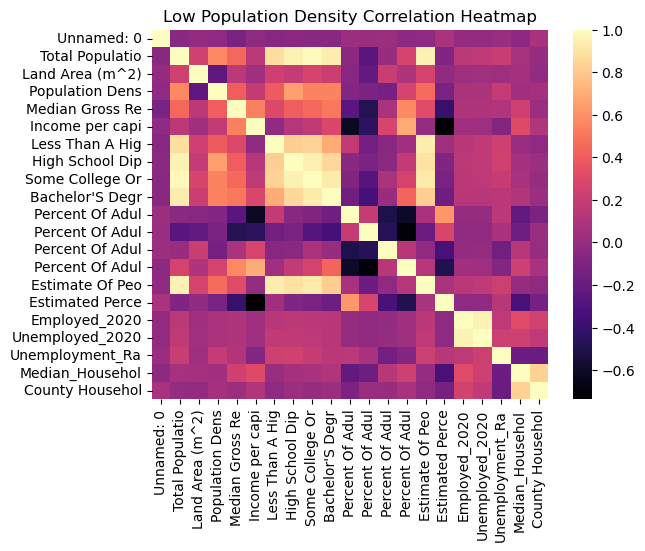

In [ ]:
low_corr_pairs = (low_corr_test.abs() > 0.7) & (low_corr_test.abs() < 1.0)
low_corr_vars = set()
for col in low_corr_pairs:
    pairs = low_corr_pairs.loc[col][low_corr_pairs.loc[col]].index.tolist()
    if len(pairs) > 1:
        low_corr_vars.add(tuple(pairs))

heat = sns.heatmap(low_corr_test, cmap = 'magma', fmt='.2f', annot_kws={"fontsize":12})
plt.title('Low Population Density Correlation Heatmap')
xticklabels = [label.get_text()[:15] for label in heat.get_xticklabels()]
yticklabels = [label.get_text()[:15] for label in heat.get_yticklabels()]
heat.set_xticklabels(xticklabels)
heat.set_yticklabels(yticklabels)